In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
%matplotlib inline
import seaborn as sns
import graphlab as gl
gl.canvas.set_target('ipynb')

### Importing the data

In [2]:
churn_data = pd.read_csv('./churn.csv')

In [3]:
# Looking at the data characteristics
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 22 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
Unnamed: 21       3333 non-null float64
dtypes: float64(9), int64(8), obje

In [4]:
churn_data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Unnamed: 21
0,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True.,96.15
1,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True.,92.29
2,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,18.40,253.9,100,11.43,10.1,9,2.73,1,True.,92.20
3,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,18.06,265.0,132,11.93,12.7,8,3.43,2,True.,90.46
4,NH,141,415,402-3370,no,yes,32,322.4,92,54.81,...,24.07,209.5,111,9.43,6.7,3,1.81,1,True.,90.12


In [5]:
# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_data[yes_no_cols] = churn_data[yes_no_cols] == 'yes'

churn = ['Churn?']
churn_data[churn] = churn_data[churn] == 'True.'

# converting boolean columns to integer type

Intl_plan = churn_data["Int'l Plan"]
churn_data["Int'l Plan"] = Intl_plan.astype(int)

vMail_plan = churn_data["VMail Plan"]
churn_data["VMail Plan"] = vMail_plan.astype(int)

churn_new = churn_data['Churn?']
churn_data['Churn'] = churn_new.astype(int)

# dropping the irrelevant data
#churn_data = churn_data.drop(['State','Area Code','Phone','Churn?'],axis=1)

# calculating the monthly bill
churn_data['month_bill'] = churn_data['Day Charge']+churn_data['Eve Charge']+churn_data['Night Charge']+churn_data['Intl Charge']

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 24 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null bool
Unnamed: 21       3333 non-null float64
Churn             3333 non-null int64


In [7]:
churn_data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Unnamed: 21,Churn,month_bill
0,NY,64,415,345-9140,1,0,0,346.8,55,58.96,...,102,12.39,13.3,9,3.59,1,True,96.15,1,96.15
1,NY,161,415,351-7269,0,0,0,332.9,67,56.59,...,128,7.23,5.4,9,1.46,4,True,92.29,1,92.29
2,CO,154,415,343-5709,0,0,0,350.8,75,59.64,...,100,11.43,10.1,9,2.73,1,True,92.20,1,92.20
3,MO,112,415,373-2053,0,0,0,335.5,77,57.04,...,132,11.93,12.7,8,3.43,2,True,90.46,1,90.46
4,NH,141,415,402-3370,0,1,32,322.4,92,54.81,...,111,9.43,6.7,3,1.81,1,True,90.12,1,90.12


In [8]:
churn_data.describe()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Unnamed: 21,Churn,month_bill
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,...,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.1449145,59.449754,0.144914,59.449754
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,...,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.3520674,10.502261,0.352067,10.502261
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,False,22.930000,0.000000,22.930000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,...,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0,52.380000,0.000000,52.380000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,...,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0,59.470000,0.000000,59.470000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,...,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0,66.480000,0.000000,66.480000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,...,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,True,96.150000,1.000000,96.150000


/Users/arun/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


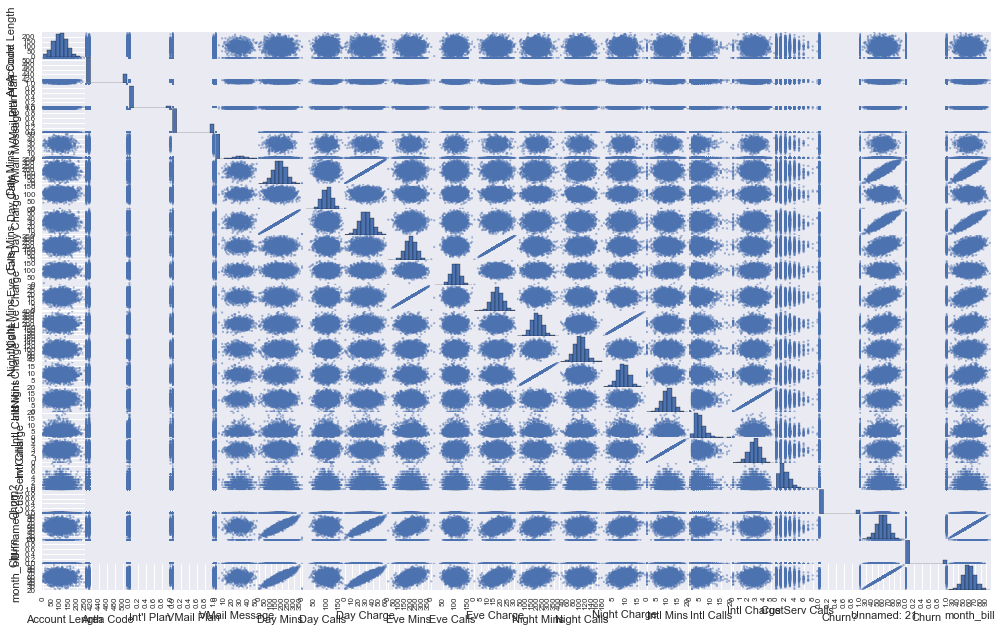

In [9]:
pd.scatter_matrix(churn_data, figsize=(17, 10), edgecolor='none', alpha=0.5);

In [10]:
churn_data.corr()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Unnamed: 21,Churn,month_bill
Account Length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,...,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.001454,0.016541,0.001454
Area Code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,...,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.008393,0.006174,-0.008393
Int'l Plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,...,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.048415,0.259852,0.048415
VMail Plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,...,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.008585,-0.102148,0.008585
VMail Message,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,...,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.009766,-0.089728,0.009766
Day Mins,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,...,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.884754,0.205151,0.884754
Day Calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,...,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003673,0.018459,0.003673
Day Charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,...,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.884757,0.205151,0.884757
Eve Mins,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,...,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.413143,0.092796,0.413143
Eve Calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,...,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.009392,0.009233,0.009392


/Users/arun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/arun/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


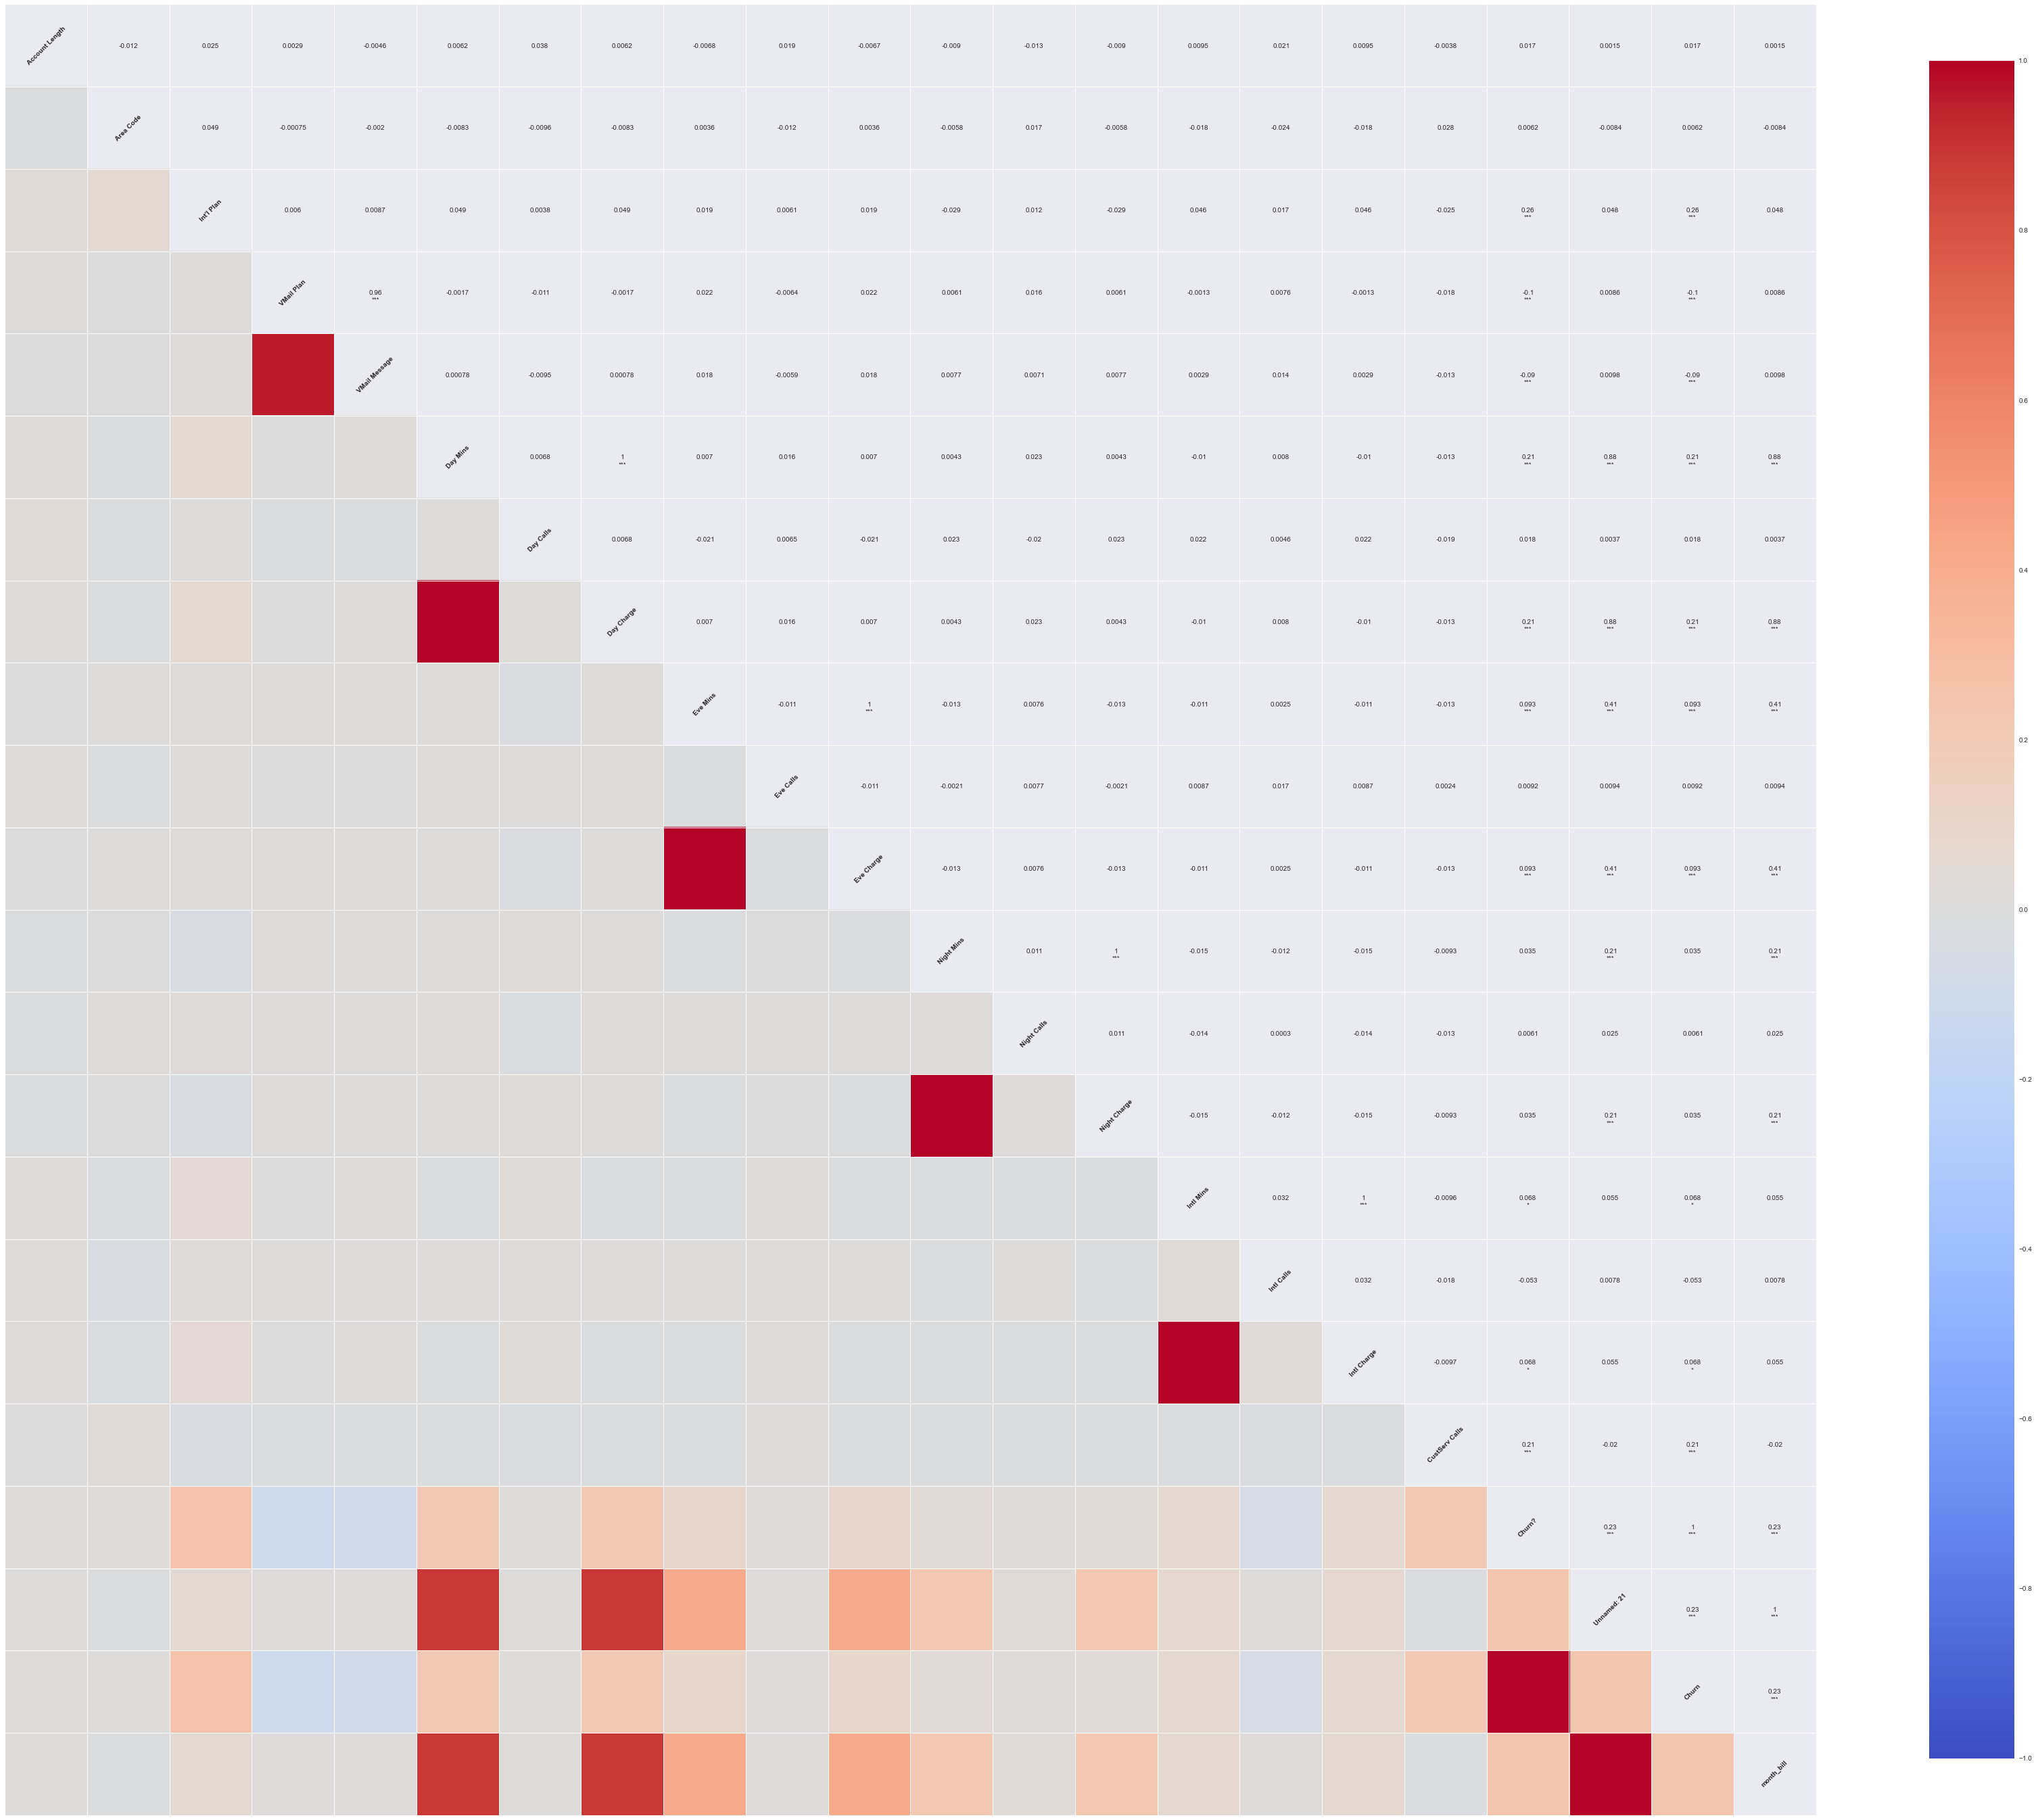

In [11]:

fig, ax = plt.subplots(figsize=(60, 60))
sns.corrplot(churn_data,ax=ax)

In [12]:
# Remove charge features as they're correlated with minutes
# Drop area code feature, phone, 

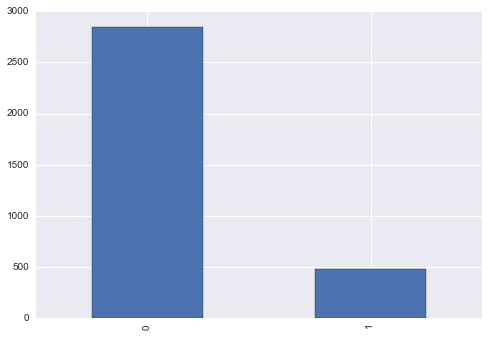

In [13]:
churn_count=pd.value_counts(churn_data['Churn'])
churn_count.plot(kind='bar')

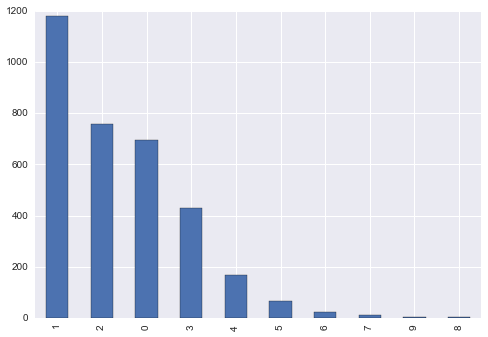

In [14]:
churn_count = pd.value_counts(churn_data['CustServ Calls'])
churn_count.plot(kind='bar')

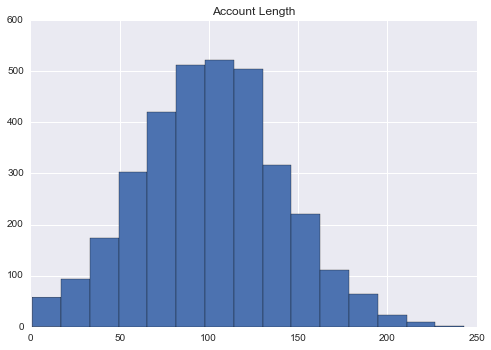

In [15]:
churn_data.hist('Account Length',bins = 15);

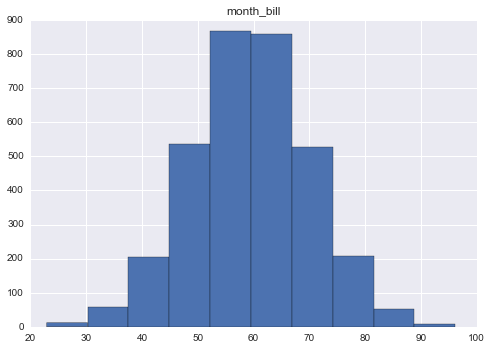

In [16]:
churn_data.hist('month_bill',bins = 10);

In [17]:
#importing the data into graphlab
churn_sFrame = gl.SFrame(churn_data)

This non-commercial license of GraphLab Create for academic use is assigned to ashar8@unh.newhaven.edu and will expire on December 15, 2016.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1481565242.log


### Data Exploration

In [18]:
churn_sFrame.show()

In [19]:
churn_sFrame.head()

State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge
NY,64,415,345-9140,1,0,0,346.8,55,58.96
NY,161,415,351-7269,0,0,0,332.9,67,56.59
CO,154,415,343-5709,0,0,0,350.8,75,59.64
MO,112,415,373-2053,0,0,0,335.5,77,57.04
NH,141,415,402-3370,0,1,32,322.4,92,54.81
MS,111,408,345-3787,0,0,0,294.7,90,50.1
OK,89,510,352-6976,0,0,0,303.9,95,51.66
OH,115,510,348-1163,1,0,0,345.3,81,58.7
OK,82,510,393-4823,0,0,0,329.8,73,56.07
MD,62,408,409-1856,0,0,0,321.1,105,54.59


In [20]:
churn_sFrame.show(view = 'Bar Chart', x = 'Account Length',y= 'Churn')

In [21]:
churn_sFrame.show(view = 'Bar Chart', x = 'CustServ Calls',y= 'Churn')

### Model building

In [22]:
churn_sFrame.rename({"Int'l Plan": 'Intl Plan'})

State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge
NY,64,415,345-9140,1,0,0,346.8,55,58.96
NY,161,415,351-7269,0,0,0,332.9,67,56.59
CO,154,415,343-5709,0,0,0,350.8,75,59.64
MO,112,415,373-2053,0,0,0,335.5,77,57.04
NH,141,415,402-3370,0,1,32,322.4,92,54.81
MS,111,408,345-3787,0,0,0,294.7,90,50.1
OK,89,510,352-6976,0,0,0,303.9,95,51.66
OH,115,510,348-1163,1,0,0,345.3,81,58.7
OK,82,510,393-4823,0,0,0,329.8,73,56.07
MD,62,408,409-1856,0,0,0,321.1,105,54.59


In [23]:
train_data,test_data = churn_sFrame.random_split(.8, seed=0)

In [24]:
# features_set = ['Account Length',"Int'l Plan", 'VMail Plan',  'VMail Message', 'Day Mins', 'Day Calls',
#                 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 
#                 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls']

features_set = ['State', 'Account Length', 'Intl Plan','VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 
                 'Eve Mins', 'Eve Calls', 'Night Mins','Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls']

Labels = ['Churn']

In [27]:
#models = gl.classifier.create(train_data,target=Labels,features= features_set)

### Logistic Classifier

In [28]:
model_logistic = gl.logistic_classifier.create(train_data,
                                                     target='Churn',
                                                     features=features_set,
                                                     validation_set=test_data,
                                                     class_weights= 'auto',
                                                     l2_penalty=0.03,
                                                     max_iterations = 10)

y_pred=model_logistic.classify(train_data)
model_logistic.evaluate(test_data)
# Evaluate the model by making predictions of target values and comparing these to actual values.
result_model_logistic = model_logistic.evaluate(test_data)
gl.canvas.set_target('ipynb')
model_logistic.show(view='Evaluation')

Logistic regression:

--------------------------------------------------------

Number of examples          : 2667

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

Number of coefficients    : 64

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.021866     | 0.780652          | 0.744745            |

| 2         | 3        | 1.038482     | 0.779153          | 0.743243            |

| 3         | 4        | 1.055433     | 0.778028          | 0.743243            |

| 4         | 5        | 1.071990     | 0.778028          | 0.743243            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

### Boosted Tree Classifier

In [29]:
# Create a (binary or multi-class) classifier model of type BoostedTreesClassifier using gradient boosted trees 
# Automatically take validation set for tuning
boosted_trees_model = gl.boosted_trees_classifier.create(train_data,
                                              features=features_set,
                                              class_weights= 'auto',           
                                              target = 'Churn')
# Return a classification, for each example in the dataset, using the trained logistic regression model.
predicitons = boosted_trees_model.classify(train_data)
# Evaluate the model by making predictions of target values and comparing these to actual values.
boosted_trees_model.evaluate(test_data)
boosted_trees_model.show(view='Evaluation')
# Evaluate the model by making predictions of target values and comparing these to actual values.
result_model_boosted = boosted_trees_model.evaluate(test_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 2533

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.008402     | 0.917890          | 0.783835            | 0.527912          | 0.578116            |

| 2         | 0.014925     | 0.917890          | 0.783835            | 0.429224          | 0.520484            |

| 3         | 0.021990     | 0.922744          | 0.797692            | 0.365149          | 0.482866            |

| 4         | 0.028474     | 0.922285          | 0.794228            | 0.318305          | 0.457957            |

| 5         | 0.034930     | 0.924350          | 0.794228            | 0.287769          | 0.446043            |

| 6         | 0.041269     | 0.926875          | 0.797692            | 0.262313          | 0.447971            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

### Random Forest Classifier

In [30]:
# The prediction is based on a collection of base learners i.e decision tree classifiers
# Different from linear models like logistic regression or SVM, gradient boosted trees can model 
# non-linear interactions between the features and the target.
random_forest_model = gl.random_forest_classifier.create(train_data,
                                              features=features_set,
                                              class_weights= 'auto',
                                              target = 'Churn')

random_forest_model.classify(train_data)
random_forest_model.evaluate(test_data)
random_forest_model.show(view='Evaluation')
# Evaluate the model by making predictions of target values and comparing these to actual values.
result_model_random_forest = random_forest_model.evaluate(test_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 2523

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.007492     | 0.901148          | 0.952751            | 0.347156          | 0.300595            |

| 2         | 0.013140     | 0.901548          | 0.933014            | 0.337387          | 0.285461            |

| 3         | 0.018109     | 0.897867          | 0.940909            | 0.349343          | 0.296509            |

| 4         | 0.022995     | 0.904787          | 0.944856            | 0.355407          | 0.297497            |

| 5         | 0.027944     | 0.901569          | 0.944856            | 0.360438          | 0.312153            |

| 6         | 0.033486     | 0.905257          | 0.944856            | 0.355093          | 0.306045            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [31]:
# The prediction is based on a collection of base learners i.e decision tree classifiers
# Different from linear models like logistic regression or SVM, gradient boosted trees can model 
# non-linear interactions between the features and the target.
svm_model = gl.svm_classifier.create(train_data,
                                              features=features_set,
                                              class_weights= 'auto',
                                              target = 'Churn')

svm_model.classify(train_data)
svm_model.evaluate(test_data)
svm_model.show(view='Evaluation')
# Evaluate the model by making predictions of target values and comparing these to actual values.
svm_model_result = svm_model.evaluate(test_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



SVM:

--------------------------------------------------------

Number of examples          : 2533

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

Number of coefficients    : 64

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.001974  | 0.048410     | 0.412949          | 0.410448            |

| 2         | 6        | 1.000000  | 0.080520     | 0.722463          | 0.694030            |

| 3         | 7        | 1.000000  | 0.092640     | 0.699961          | 0.671642            |

| 4         | 8        | 1.000000  | 0.105389     | 0.685353          | 0.656716            |

| 5         | 9        | 1.000000  | 0.125423     | 0.751678          | 0.738806            |

| 6         | 10       | 1.000000  | 0.173228     | 0.717726          | 0.671642            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

### Model Evaluation - Comparing the three models

In [32]:
def print_statistics(result):
    print "*" * 30
    print "Accuracy        : ", result["accuracy"]
    print "Precision       : ", result['precision']
    print "Recall          : ", result['recall']
    print "AUC             : ", result['auc']
    print "Confusion Matrix: \n", result["confusion_matrix"]

print_statistics(result_model_logistic)
print_statistics(result_model_boosted)
print_statistics(result_model_random_forest)
print_statistics(svm_model_result)

******************************
Accuracy        :  0.743243243243
Precision       :  0.339285714286
Recall          :  0.767676767677
AUC             :  0.807849215257
Confusion Matrix: 
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        0        |  419  |
|      0       |        1        |  148  |
|      1       |        1        |   76  |
|      1       |        0        |   23  |
+--------------+-----------------+-------+
[4 rows x 3 columns]

******************************
Accuracy        :  0.927927927928
Precision       :  0.742857142857
Recall          :  0.787878787879
AUC             :  0.908387223202
Confusion Matrix: 
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |   27  |
|      0       |        0        |  540  |
|      1       |        1        |   78  |
|   

KeyError: 'auc'

### Boosted tree classifier is the best among three

In [44]:
from graphlab import model_parameter_search
# Search over a grid of multiple hyper-parameters, with validation set
params = {'target': 'Churn'}

job = model_parameter_search.create((train_data,test_data),
                                        gl.boosted_trees_classifier.create,
                                        params)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Dec-12-2016-10-06-2500000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Dec-12-2016-10-06-2500000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Dec-12-2016-10-06-2500000' already exists. Renaming the job to 'Model-Parameter-Search-Dec-12-2016-10-06-2500000-3bbf7'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Dec-12-2016-10-06-2500000-3bbf7' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Dec-12-2016-10-06-2500000-3bbf7' scheduled.


In [41]:
results = job.get_results()
print results

+----------+------------------+-----------------------+-----------+----------------+
| model_id | column_subsample | early_stopping_rounds | max_depth | max_iterations |
+----------+------------------+-----------------------+-----------+----------------+
|    9     |       0.9        |           5           |     4     |      100       |
|    8     |       1.0        |           5           |     4     |      100       |
|    1     |       0.9        |           5           |     6     |      100       |
|    0     |       0.8        |           5           |     4     |      100       |
|    3     |       1.0        |           5           |     4     |      100       |
|    2     |       0.8        |           5           |     10    |      100       |
|    5     |       1.0        |           5           |     6     |      100       |
|    4     |       1.0        |           5           |     8     |      100       |
|    7     |       0.9        |           5           |     4    

In [46]:
# Create a (binary or multi-class) classifier model of type BoostedTreesClassifier using gradient boosted trees 
# Automatically take validation set for tuning
boosted_trees_model = gl.boosted_trees_classifier.create(train_data, 'Churn', features=features_set, max_iterations=100, 
                                   validation_set=test_data, class_weights= None, max_depth=4, step_size=0.1, 
                                   min_loss_reduction=1, min_child_weight=2, row_subsample=0.9, 
                                   column_subsample=1.0, verbose=True, random_seed=None)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 2667

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 14

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.006939     | 0.930634          | 0.899399            | 0.621083          | 0.625423            |

| 2         | 0.011551     | 0.943757          | 0.926426            | 0.562462          | 0.568800            |

| 3         | 0.015426     | 0.930259          | 0.908408            | 0.512984          | 0.521570            |

| 4         | 0.019572     | 0.944507          | 0.926426            | 0.470312          | 0.481036            |

| 5         | 0.024148     | 0.948256          | 0.926426            | 0.434420          | 0.448096            |

| 6         | 0.027878     | 0.947507          | 0.932432            | 0.403677          | 0.418606            |

| 11        | 0.048707     | 0.950506          | 0.930931            | 0.291781          | 0.317082            |

| 51        | 0.221395     | 0.970754          | 0.947447            | 0.130326          | 0.177555            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [47]:
# Return a classification, for each example in the dataset, using the trained logistic regression model.
predicitons = boosted_trees_model.classify(train_data)
# Evaluate the model by making predictions of target values and comparing these to actual values.
boosted_trees_model.evaluate(test_data)
boosted_trees_model.show(view='Evaluation')
# Evaluate the model by making predictions of target values and comparing these to actual values.
result_model_boosted = boosted_trees_model.evaluate(test_data)

In [48]:
print_statistics(result_model_boosted)

******************************
Accuracy        :  0.95045045045
Precision       :  0.9125
Recall          :  0.737373737374
AUC             :  0.927110612296
Confusion Matrix: 
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |   7   |
|      0       |        0        |  560  |
|      1       |        1        |   73  |
|      1       |        0        |   26  |
+--------------+-----------------+-------+
[4 rows x 3 columns]



In [50]:
# Calculating the probabilities
predict_prob = boosted_trees_model.predict(churn_sFrame, output_type='probability')

In [51]:
churn_sFrame['predicted_prob']= predict_prob

In [52]:
churn_sFrame.head()

State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge
NY,64,415,345-9140,1,0,0,346.8,55,58.96
NY,161,415,351-7269,0,0,0,332.9,67,56.59
CO,154,415,343-5709,0,0,0,350.8,75,59.64
MO,112,415,373-2053,0,0,0,335.5,77,57.04
NH,141,415,402-3370,0,1,32,322.4,92,54.81
MS,111,408,345-3787,0,0,0,294.7,90,50.1
OK,89,510,352-6976,0,0,0,303.9,95,51.66
OH,115,510,348-1163,1,0,0,345.3,81,58.7
OK,82,510,393-4823,0,0,0,329.8,73,56.07
MD,62,408,409-1856,0,0,0,321.1,105,54.59


In [53]:
# Calculating the estimated loss
churn_sFrame['estimated_loss']= churn_sFrame['predicted_prob'] * churn_sFrame['month_bill']

In [54]:
churn_sFrame.print_rows(num_rows=100, num_columns=21)

+-------+----------------+-----------+----------+-----------+------------+---------------+
| State | Account Length | Area Code |  Phone   | Intl Plan | VMail Plan | VMail Message |
+-------+----------------+-----------+----------+-----------+------------+---------------+
|   NY  |       64       |    415    | 345-9140 |     1     |     0      |       0       |
|   NY  |      161       |    415    | 351-7269 |     0     |     0      |       0       |
|   CO  |      154       |    415    | 343-5709 |     0     |     0      |       0       |
|   MO  |      112       |    415    | 373-2053 |     0     |     0      |       0       |
|   NH  |      141       |    415    | 402-3370 |     0     |     1      |       32      |
|   MS  |      111       |    408    | 345-3787 |     0     |     0      |       0       |
|   OK  |       89       |    510    | 352-6976 |     0     |     0      |       0       |
|   OH  |      115       |    510    | 348-1163 |     1     |     0      |       0       |

In [55]:
# Look at lots of descriptive statistics of 'estimated_loss'
print "mean: " + str(churn_sFrame['estimated_loss'].mean())
print "std: " + str(churn_sFrame['estimated_loss'].std())
print "var: " + str(churn_sFrame['estimated_loss'].var())
print "min: " + str(churn_sFrame['estimated_loss'].min())
print "max: " + str(churn_sFrame['estimated_loss'].max())
print "sum: " + str(churn_sFrame['estimated_loss'].sum())


mean: 9.32522467691
std: 18.8862787488
var: 356.691524977
min: 0.200509738252
max: 96.0155682474
sum: 31080.9738482


### Estimated loss of revenue is $31080.97 (looking at current 3333 customers with 483 customers who have churn)